# Aula 01: introdução

## 1.1 - Bibliotecas

Primeiramente, em nosso curso, vamos entender um pouco sobre as duas bibliotecas que usaremos: OpenCV e Numpy 



O OpenCV: Ou Open Source Computer Vision Library, originalmente criado pela Intel em 2000, é uma biblioteca multiplataforma utilizada para o desenvolvimento de aplicativos na área de visão computacional. Essa biblioteca possui módulos de processamento de imagens e de video, estrutura de dados, álgebra linear, interface gráfica básica com sistema de janelas independentes, controle de dispositivos de entrada e saída, além de mais de 350 algoritmos de visão computacional como: Filtros de imagem, calibração de câmera, reconhecimento de objetos, análise estrutural e outros. 


Numpy: É um pacote para a linguagem Python que suporta arrays e matrizes multidimensionais, possuindo uma larga coleção de funções matemáticas para trabalhar com estas estruturas. No nosso curso eles será usado para construir matrizes e vetores que nos ajude a trabalhar com cores, diagramação de imagens e fatores como saturação, brilho e intensidade.

## 1.2 - Primeiras funções 

Agora que já temos uma noção bem básica das bibliotecas, vamos entender um pouco sobre o conceito de imagem.
A primeira coisa que temos que ter em mente é que a menor unidade de imagem é formada por pixels. Por mais que você não possa enxergar eles numa imagem, um pixel pode conter a intensidade de cores, de brilho ou simplesmente valores de tons de cinza, por exemplo. O significado do pixel é definido pelo espaço de cores. Também devemos levar em conta que a densidade de pixels pode definir o nível de nitidez em uma imagem. 

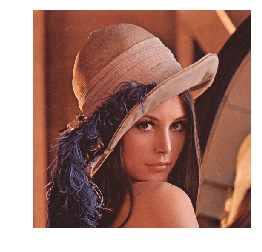

In [1]:
import cv2 #importa opencv para utilização no notebook
import matplotlib.pyplot as plt #importa matplotlib pyplot para exibição da imagem
%matplotlib inline

###
# O Código abaixo carrega imagem, 
# desliga os *axis* do plot
# modifica o espaço de cores para que o matplotlib possa compreender a imagem
# finalmente mostra a imagem
###

img = cv2.imread("img/lena512.png")
plt.axis("off")

# O espaço de cores padrão do opencv é BGR e o do matplotlib é RGB
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Em nosso curso iremos aprender como manipular esses pixels de varias formas (alterando suas cores,saturação e posições).

O primeiro passo é aprender como abrir uma imagem utilizando o OpenCV. Uma coisa que facilita muito o processo, é salvar a imagem na mesma pastaem que seu script está rodando, assim não precisamos digitar todo o diretório da imagem. Essa é uma boa prática para projetos pequenos, mas difícil de manter o *tracking* quando trabalhando em grandes projetos.

Parâmetros: 
* `.imread(<imagem a ser lida>)`
* `.imshow(<nome da imagem>, <imagem>)`

In [2]:
img = cv2.imread("img/lena512.png")
cv2.imshow("imagem",img)
cv2.waitKey(0)
# while (cv2.waitKey() & 0xff) != ord('q'): pass
cv2.destroyAllWindows()

Percebam que anteriormente utilizamos o comando da biblioteca matplotlib para mostrar a imagem em nosso notebook. Agora o comando utilizado abre uma nova janela. Esse comando é da biblioteca opencv e utiliza uma interface gráfica Tk para renderizar a imagem em uma janela externa ao nosso notebook.

Esse comando tem utilização um pouco mais complexa, visto que é preciso que a sequencia de comandos:
``` 
cv2.imshow("imagem",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
```

o comando `imshow` exibe a imagem em uma nova janela, o comando `waitKey` espera que alguma tecla seja pressionada para continuar o programa até que quando a ação acontece, a linha com o comando `destroyAllWindows` é alcançada, o que força a janela externa do notebook seja fechada. Essa utilização será interessante quando o processamento de vídeos, visto que é mais fácil trabalhar em vídeo com Tk do que renderizá-lo no notebook.

Em outros momentos, será interessante que a imagem seja gravada em outro formato do que o original. Para isso devemos utilizar os comandos opencv `imwrite`.

In [3]:
img = cv2.imread("img/lena512.png")
cv2.imwrite("lena512.jpg",img)

True

Parâmetros: 
* `.imwrite(<novo nome da imagem.novoformato>, <imagem>)`

Quando você está processando digitalmente uma imagem, é preciso que você conheça a representação matricial dessa imagem. Um comando que pode ser útil nesses casos é a função `.shape` do opencv. Essa função mostra as dimensões da imagem (horizontais e verticais) em quatidade de pixels. O terceiro termo é a quantidade de matrizes dependente do sistema de cores.

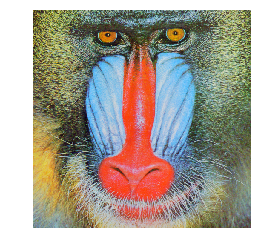

In [4]:
img = cv2.imread("img/baboon.png")

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
print(img.shape)

(512, 512, 3)


Por exemplo o comando `.shape` acima tem uma imagem de 512x512 pixels e três matrizes de cores (RGB).

Com o opencv também é possível manipular diretamente os pixels da figura. Por exemplo as funções .item() e .itemset() podem ser utilizadas para verificar a intensidade de uma certa cor em um determinado pixel da imagem.

In [6]:
###
# Por exemplo o comando abaixo utiliza a função print
# para mostrar a intensidade de cor do pixel x=147, y=109
# da matriz de cor verde (2)
###

print(img.item(147,109,2))

165


O exemplo abaixo é um pouco mais complexo e utiliza uma função iterativa para visualizar linha a linha das matrizes (vermelho, verde e azul) do arquivo baboon. Por enquanto não preocupe-se em compreender a função iteract. O importante nesse exemplo é que você compreenda como o opencv organiza uma imagem na memória em forma de matrizes e como podemos trabalhar matematicamente com essas imagens.

In [7]:
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

img = cv2.imread("img/baboon.png")

def plot_func(line):
    y = img[line,:,:]
    
    # mostra linha da matriz vermelha
    plt.subplot(3, 1, 1)
    plt.plot(y[:,0], color='red')
    plt.axis("off")
    
    # mostra linha da matriz verde
    plt.subplot(3, 1, 2)
    plt.plot(y[:,1], color='green')
    plt.axis("off")
    
    # mostra linha da matriz azul
    plt.subplot(3, 1, 3)
    plt.plot(y[:,2], color='blue')
    plt.axis("off")

interact(plot_func, line=widgets.IntSlider(min=0,max=511,step=1,value=255))

interactive(children=(IntSlider(value=255, description='line', max=511), Output()), _dom_classes=('widget-inte…

<function __main__.plot_func(line)>

Usando a função `.itemset()`, podemos alterar a cor de pixel (ou de uma linha de pixes, ou de uma coluna...). Vamos utilizar o mesmo pixel do exemplo anterior e alterar sua cor. É importante informar no código qual a intensidade de cada canal de cor, lembrando que pela ordem: `0=azul`, `1=verde`, `2=vermelho`.

165
(512, 512, 3)


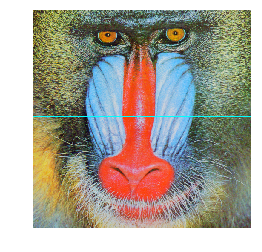

In [8]:
img = cv2.imread("img/baboon.png")
print(img.item(147,109,2))
print(img.shape)
for x in range(0,511): img.itemset((250,x,0),255)
for x in range(0,511): img.itemset((250,x,1),255)
for x in range(0,511): img.itemset((250,x,2),0)
plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Parâmetros: 
* `.item(<linha>, <coluna>, <codigo de cores do pixel>)`
* `.itemset((<linha>, <coluna>, <codigo de cores do pixel>), <nova cor do pixel>)`

# Atividade

Com as funções ensinadas tente elaborar um programa que:
1. mostre uma imagem, 
2. leia os valores digitados por um usuário e armazene os valores de coordenadas (y e x), 
3. definit qual cor ele quer que seja verificado a intensidade 
4. mostre esses valores utilizando 'print()'. 

Além disso faça outras variáveis que permitam a alteração de um pixel específico, escolhidos pelo usuário.
Dica: lembre das funções do python (def).